In [50]:
import numpy as np
import os
import re
from sklearn import model_selection
# import math

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
# Creating two lists, one list for input data and another for output data (catagotries)
# We will iterate through files using modules os sot that we can make our lists easily
X = []
Y = []
for catagory in os.listdir("C:/Users/Ritish/Desktop/20_newsgroups"):
    for document in os.listdir("C:/Users/Ritish/Desktop/20_newsgroups/" + catagory):
        with open("C:/Users/Ritish/Desktop/20_newsgroups/" + catagory + '/' + document, "r") as file:
            X.append(file.read())
            Y.append(catagory)

In [4]:
# Let's check if we are good to go and have got what we were expected to get

print(type(X)) # We needed the list only
print(type(Y)) # List needed only
print(len(X)) # Must be same as length of Y
print(len(Y)) # Must be same as length of X

<class 'list'>
<class 'list'>
19997
19997


In [5]:
# Now we have got our data, now we must split into training and testing to test what we have trained later

x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#Our split data has been approximately split into 1:3 proportion i.e. training and testing respectively

print(len(x_train))
print(len(x_test))

14997
5000


In [7]:
# Let's check how regular expression split works, import re

sample = "Hey! I am Ritish, Thanks for evaluating my project."
print(re.split(r'\W+',sample))
# That's great, we have now got our requried split, aboiding the special characters

['Hey', 'I', 'am', 'Ritish', 'Thanks', 'for', 'evaluating', 'my', 'project', '']


In [8]:
# Now let's impliment the same technique in our inputs

vocabDict = {} #This is the dictionary for our vocabulary for our training data
for i in x_train: # Iterating through each document in our training split set
    word = i.lower() # Now equality is important so making all the cases equal to lowercase
    splitWord = re.split(r'\W+', word) # Splitting the document as shown in above cell
    for each in splitWord: # Iterating through each word in the split list
        if((each.isalpha() == False) or (len(each) <= 2) or (each in stop_word)): # Must be an alphabet, good length anf not a stopword
            continue
        if(vocabDict.get(each) == None): #If not in dictionary, no issues we will add
            vocabDict[each] = 1
        else:
            vocabDict[each] += 1 #If already in dictionary, Great!, incriment it!

In [9]:
# Now our dictionary is ready I checked it, showing you after sorting it, Right? I guess it's a good choice.

sortedVocab = {k: v for k, v in sorted(vocabDict.items(), key=lambda item: item[1], reverse = True)} # Reverse for descending
print(sortedVocab) # Here is the final dictionary we have got

{'edu': 123517, 'cmu': 39284, 'com': 37671, 'news': 25854, 'not': 25161, 'srv': 24231, 'cantaloupe': 19515, 'net': 19074, 'message': 16497, 'subject': 16254, 'lines': 15681, 'date': 15599, 'apr': 15391, 'newsgroups': 15292, 'path': 15271, 'can': 15006, 'organization': 14844, 'state': 14268, 'gmt': 13358, 'ohio': 12001, 'one': 11598, 'will': 11572, 'writes': 11094, 'article': 10137, 'comp': 9886, 'references': 9734, 'talk': 9196, 'misc': 8941, 'sender': 8328, 'ans': 8313, 'howland': 8237, 'reston': 8218, 'don': 7897, 'people': 7699, 'like': 7621, 'university': 7574, 'just': 7384, 'posting': 7266, 'nntp': 6994, 'mps': 6973, 'know': 6872, 'host': 6656, 'get': 6543, 'sci': 6441, 'zaphod': 6286, 'usenet': 6235, 'think': 6173, 'may': 6151, 'alt': 5976, 'politics': 5806, 'windows': 5765, 'also': 5676, 'rutgers': 5423, 'time': 5251, 'use': 5215, 'eng': 5162, 'new': 5121, 'harvard': 5118, 'near': 5111, 'rec': 4855, 'good': 4726, 'crabapple': 4656, 'sei': 4653, 'system': 4628, 'noc': 4616, 'soc'

In [10]:
import matplotlib.pyplot as plt

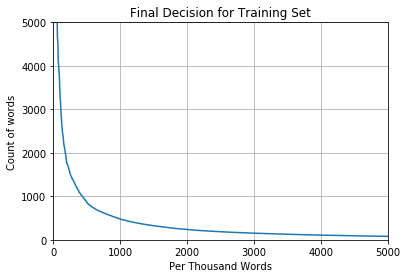

In [11]:
# Let's visualize how much words to be taken with graph
tup = list(sortedVocab.items()) # Created a list of tuples of our dictionary in descending order
x_axis = [] # Empty list for x axis
y_axis = [] # Empty list for y axis
for i in range(len(tup)): #Iterating through each tuple
    x_axis.append(i) # For each word (top word) appending into x axis
    y_axis.append(tup[i][1]) # Appending count from top
    
# Plotting of the graph
plt.plot(x_axis, y_axis)
plt.axis([0, 5000, 0, 5000]) # To make it for top 5000 words
plt.title("Final Decision for Training Set")
plt.xlabel("Per Thousand Words")
plt.ylabel("Count of words")
plt.grid()
plt.show()

#### As per the above graph, the significant values can be top 2000 word, considering that

In [12]:
# So creating the list for top 2000 words
vocab = []
for i in range(2000): # Getting top 2000 words
    vocab.append(tup[i][0])
print(len(vocab))

2000


In [13]:
# Creating a input dataset structure with default values zeroes
# Later will iterate through document and check for the number of vocab values and append accordingly

finalTrain = np.zeros((len(x_train), len(vocab)), int)

### Creating our Final DataSet (Usable)

In [14]:
# Here we completes our dataset, now here we have required type of input and output values
#Let's see below how we did this!!!

for i in range(len(x_train)): # We had the training set, iterating through its length to get indices
    tempDict = {} # Each time we iterate we create a new dictionary as we move on another row
    tempWord = x_train[i].lower() # Equality is must, so all the words are in lowercase for equality
    tempSplit = re.split(r'\W+',tempWord) #Splitting as defined in above cells (in starting) 
    for word in tempSplit: # We got the split into list, getting through all the word split
        if(word not in tempDict): # Remeber we created a dict on each iteration? Checking if the split word exists in that!
            tempDict[word] = 1 # If the word do not exist, we make the existance by giving value 1
        else: # If the value already exists
            tempDict[word] += 1 # We increase the count on each iteration of that single word in each document in each row

            # The above code creates the count dictionary for each word now let's work on the 2-D array
            
    for j in range(len(vocab)): #We had vocab variable containing 2000 words (Based on highest frequency), Geting the indices
        vocabWord = vocab[j]
        if(vocabWord in tempDict): # If the word is there in that document then it must be in dictionary
            finalTrain[i][j] = tempDict[vocabWord] #If the word is in dictionary we replace that index of row with that value
        else: #Other Will relax!!!
            pass # Fun Here! No word found in that dict, so did nothing.

#### Now our training dataset is good to go! Let's convert the testing set in the same form

In [15]:
testInput = np.zeros((len(x_test), len(vocab)), int)

for i in range(len(x_test)): # We had the training set, iterating through its length to get indices
    tempDict = {} # Each time we iterate we create a new dictionary as we move on another row
    tempWord = x_test[i].lower() # Equality is must, so all the words are in lowercase for equality
    tempSplit = re.split(r'\W+',tempWord) #Splitting as defined in above cells (in starting) 
    for word in tempSplit: # We got the split into list, getting through all the word split
        if(word not in tempDict): # Remeber we created a dict on each iteration? Checking if the split word exists in that!
            tempDict[word] = 1 # If the word do not exist, we make the existance by giving value 1
        else: # If the value already exists
            tempDict[word] += 1 # We increase the count on each iteration of that single word in each document in each row

            # The above code creates the count dictionary for each word now let's work on the 2-D array
            
    for j in range(len(vocab)): #We had vocab variable containing 2000 words (Based on highest frequency), Geting the indices
        vocabWord = vocab[j]
        if(vocabWord in tempDict): # If the word is there in that document then it must be in dictionary
            testInput[i][j] = tempDict[vocabWord] #If the word is in dictionary we replace that index of row with that value
        else: #Other Will relax!!!
            pass # Fun Here! No word found in that dict, so did nothing.

#### Implementation of Naive Bayes Algorithm with Sklearn

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
clf = MultinomialNB()
clf.fit(finalTrain, y_train)
test_Predict = clf.predict(testInput)
print("Score on training dataset: ",clf.score(finalTrain, y_train))
print("Score on testing dataset: ",clf.score(testInput, y_test))

Score on training dataset:  0.8935120357404814
Score on testing dataset:  0.8554


#### Self Implementation on Naive Bayes

In [18]:
# As we need the numpy array for faster calculations and making our life easy
# Let us convert the y_train into numpy array
y_train = np.array(y_train)


In [22]:
# This is the fit function, in which we build a dictionary which will contain all the details of our features corresponding
# to the respective class

def fit(X, Y): # Declaration of function
    result = {} # Initialization of Dictionary
    unique_class = set(Y) # Getting unique classes, means getting all the types of classes we have in our dataset (training)
    result["total_data"] = len(Y)
    for each_class in unique_class: # Interating through each class
        result[each_class] = {} #Building a "key" within our result dicitonary for each class which contain the class data
        each_class_row = (Y == each_class) # Outputs corresponsing to the particular class in the training dataset (Boolean Form)
        X_row = X[each_class_row] # Inputs corresponding to each class
        Y_row = Y[each_class_row] # Output corresponding to each class
        all_features = X.shape[1] # Getting through al features (in this class we have 2000, but not fixed generally)
        result[each_class]["total_class"] = len(Y_row) # Foe each class, we built a dict, now in that we build key for each feat
        for each_feature in range(1, all_features + 1, 1): 
            result[each_class][each_feature] = {} # We start having the keys from 1 tillt the last key number
            each_feature_sum = X[each_class_row][:, each_feature - 1].sum() # Each feature key will have it's sum as value
            result[each_class][each_feature]["sum"] = each_feature_sum #Allotting that value to each feature we made a key
        total_sum = X[each_class_row][:, :].sum() # Total sum of features in the particular class
        result[each_class]["all_features_sum"] = total_sum #Alloting the total sum
    return result # returning result
        
ans = fit(finalTrain, y_train) # Calling the function

#### We have got our dictionary, now let's work on our testing dataset which we have created durring split

In [78]:
# In this function we will get the probability for each feature occuring the class, baye's,theorem will be used

def probability(ans, everyclass, eachInput):
    output = np.log((ans[everyclass]["total_class"])) - np.log((ans["total_data"])) # Probability P(Y = ai) 
    total_features = len(ans[everyclass].keys()) - 2 # -2 because we added total_class and feature count as additional keys
    for every_feature in range(1, total_features + 1): 
        this_feature = eachInput[every_feature - 1] # Accessing each feature
        if(this_feature == 0):
            continue
#         print(ans[everyclass][every_feature])
        numerator = (ans[everyclass][every_feature]["sum"])+ 1 # Used laplace correction
        denominator = ans[everyclass]["all_features_sum"] + (len(ans[everyclass].keys()) - 2) # Used laplace correction
        input_p = np.log(numerator) - np.log(denominator)
        output = output + input_p
    return output # returning overall probability

In [52]:
# This function will predict the class for each input in the whole big testing dataset

def singleClass(eachInput, ans): # Declarating of singleCLass function
    max_probability = -1 # Assuming the initial probability to be -1, as probability can't be negative
    best_class = -1 # Initializing the class with the impossible value
    total_classes = list(ans.keys())[1:] # List of all unique classes
    first_run = True # For changing our initialization on first loop
    for everyclass in total_classes: # Iterating through each class
        p_current_class = probability(ans, everyclass, eachInput) 
        if(first_run or p_current_class > max_probability):
            max_probability = p_current_class # When we get better probability on some class we will change this max
            best_class = everyclass # CHange the class when we get a probability
        first_run = False
    return best_class # returning the best class for the input

In [53]:
# function for prediction
# In this we will give our testing dataset, and iterating through each input and add its result in a list for the end

def predict(ans, testInput): # Declarating of the function
    predictions = [] # List for storing the predicted class for each input in the test dataser
    for eachInput in testInput: # Interating through test dataset, to access each particulat input
        predicted_class = singleClass(eachInput, ans) # Storing the predicted class for single input
        predictions.append(predicted_class) # Appending that class to the list
    return predictions # returning all the predictions for the whole dataset

In [79]:
a = predict(ans, testInput) # Calling and storing the predict function output

In [77]:
# Score on testing data

den = len(y_test)
num = 0
for i in range(den):
    if(y_test[i] == a[i]):
        num += 1
    else:
        pass
print("Score on testing data :", (num / den) * 100)

Score on testing data : 86.74


### Comparison with sklearn with self implementation

As we have compared the sklearn prediction, it can be clearly concluded that the self written Naive Bayes Code is slighly better in prediction than sklearn. As the score on testing data comes out to be

sklearn score : 0.8554 i.e. 85.54% correct predictions
self written : 0.8674 i.e. 86.74% correct predictions